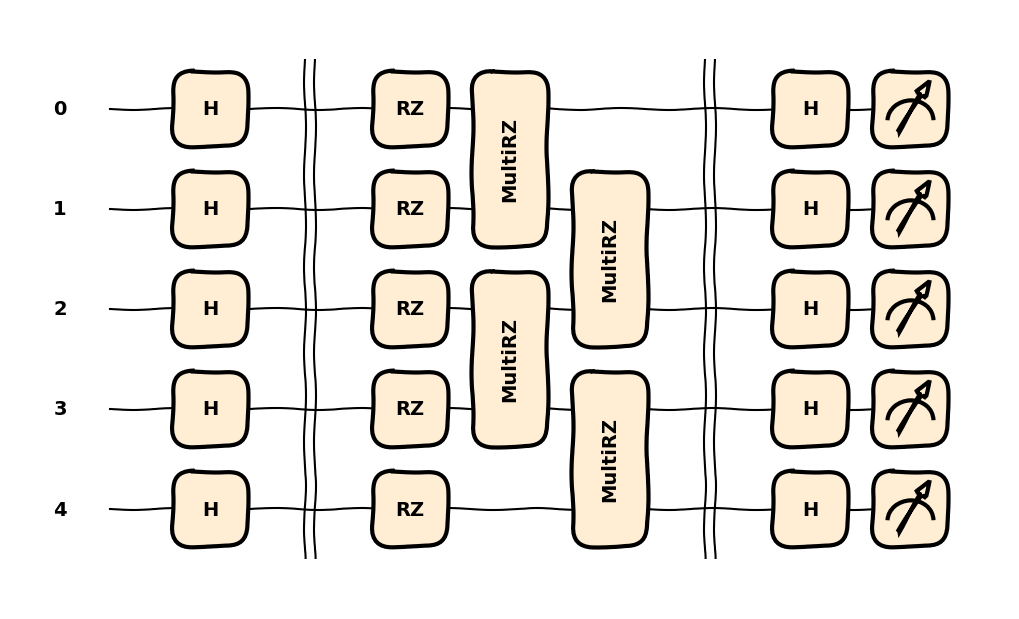

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the quantum device with 5 qubits
dev = qml.device('default.qubit', wires=5)

@qml.qnode(dev)
def circuit(params):
    """
    Quantum circuit based on the provided diagram, using RZ and RZZ gates.
    
    Args:
        params (array): A numpy array of 9 rotation angles [θ_1, ..., θ_9].
    """
    # 1. Initial Hadamard layer
    for i in range(5):
        qml.Hadamard(wires=i)
    qml.Barrier() 
    # 2. Parameterized single-qubit rotations (θ_1 to θ_5) - Changed to RZ
    for i in range(5):
        qml.RZ(params[i], wires=i)
        
    # 3. First entangling layer - Changed to RZZ
    qml.MultiRZ(params[5], wires=[0, 1])  # Gate θ_6
    qml.MultiRZ(params[6], wires=[2, 3])  # Gate θ_7
    
    # 4. Second entangling layer - Changed to RZZ
    qml.MultiRZ(params[7], wires=[1, 2])  # Gate θ_8
    qml.MultiRZ(params[8], wires=[3, 4])  # Gate θ_9
    
    qml.Barrier()
    # 5. Final Hadamard layer
    for i in range(5):
        qml.Hadamard(wires=i)
        
    # 6. Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(5)]

# --- Drawing the circuit ---
qml.drawer.use_style('sketch')
# Use some example parameters for drawing
thetas = np.array([0.5, 1.2, 2.1, 1.8, 0.2, 2.5, 3.0, 2.8, 1.4], requires_grad=True)

# Generate the circuit drawing using the matplotlib drawer
fig, ax = qml.draw_mpl(circuit)(thetas)

# To display the plot, uncomment the line below
# plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

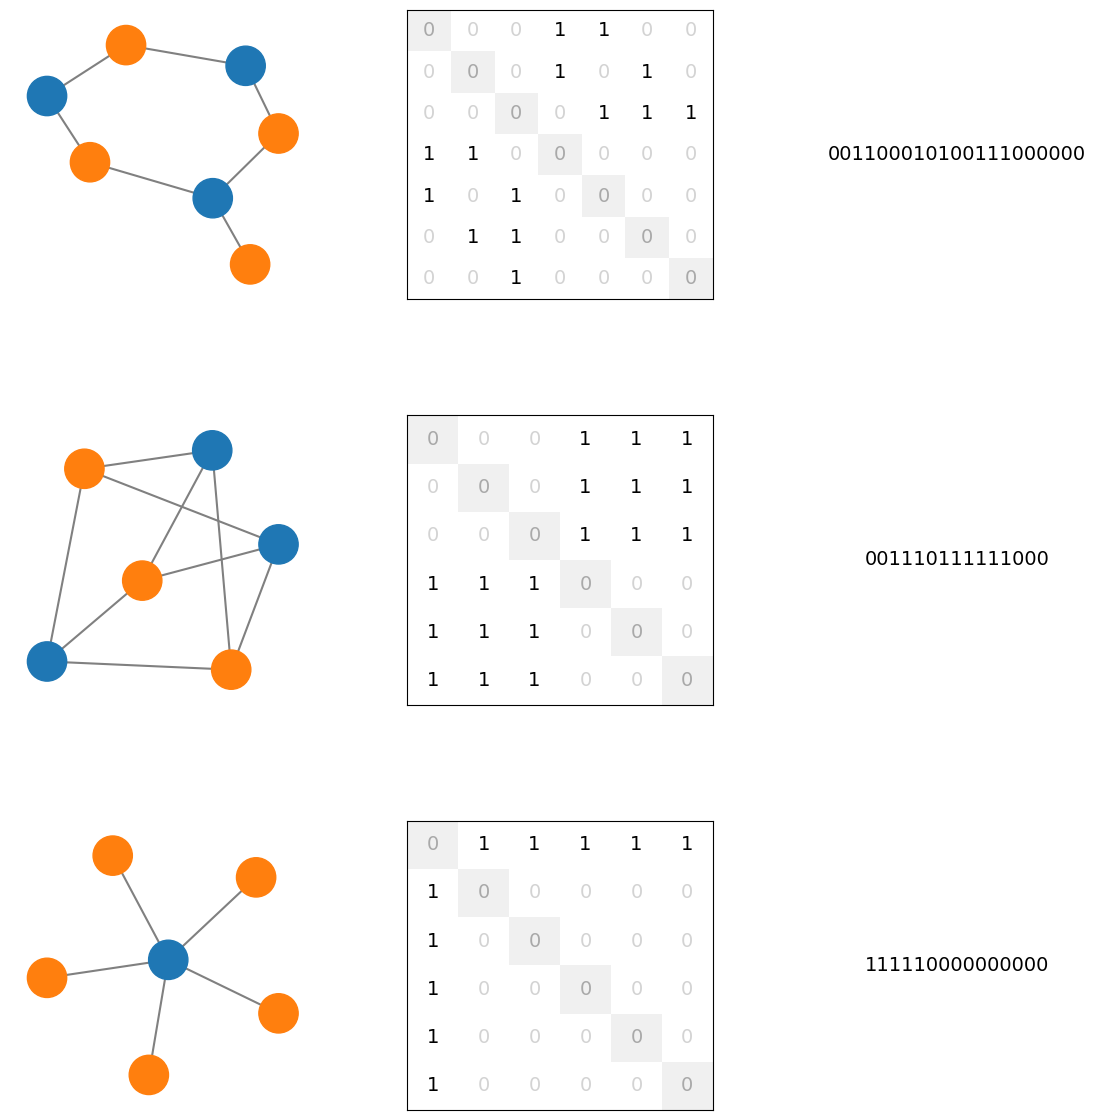

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# --- Configuration for Academic Style Plotting ---
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# --- Reusable Plotting Function ---
def plot_graph_and_matrix(graph, axes):
    """
    Generates and plots the graph visualization, its adjacency matrix,
    and the flattened upper-triangular binary string onto a given set of axes.
    
    Args:
        graph (nx.Graph): A NetworkX graph object with a 'bipartite' attribute.
        axes (list): A list or tuple of three matplotlib axes (ax1, ax2, ax3).
    """
    ax1, ax2, ax3 = axes

    # --- 1. Generate Node Positions and Colors ---
    pos = nx.spring_layout(graph, seed=42)
    node_colors = ['#1f77b4' if graph.nodes[node]['bipartite'] == 0 else '#ff7f0e' for node in graph.nodes()]

    # --- 2. Generate the Adjacency Matrix and Binary String ---
    node_order = sorted(list(graph.nodes()))
    adj_matrix = nx.to_numpy_array(graph, nodelist=node_order)
    
    upper_triangle_indices = np.triu_indices_from(adj_matrix, k=1)
    binary_string_array = adj_matrix[upper_triangle_indices]
    binary_string = "".join(binary_string_array.astype(int).astype(str))

    # --- 3. Plot the Graph, Matrix, and String ---

    # Subplot 1: Bipartite Graph
    nx.draw(
        graph, pos=pos, with_labels=False, node_color=node_colors,
        node_size=800, width=1.5, edge_color='gray', ax=ax1
    )
    ax1.margins(0.1)

    # Subplot 2: Adjacency Matrix
    ax2.set_facecolor('white')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.grid(which="major", color="#e0e0e0", linestyle='-', linewidth=0.7)
    ax2.tick_params(which="major", size=0)
    ax2.set_xlim(-0.5, adj_matrix.shape[1] - 0.5)
    ax2.set_ylim(adj_matrix.shape[0] - 0.5, -0.5)

    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if i == j:
                rect = plt.Rectangle([j - 0.5, i - 0.5], 1, 1, facecolor='#f0f0f0', zorder=0)
                ax2.add_patch(rect)
                ax2.text(j, i, '0', ha="center", va="center", color="darkgray", fontsize=14)
            elif adj_matrix[i, j] == 1:
                ax2.text(j, i, '1', ha="center", va="center", color="black", fontsize=14)
            else:
                ax2.text(j, i, '0', ha="center", va="center", color="lightgray", fontsize=14)
    
    # Subplot 3: Flattened Binary String
    ax3.axis('off')
    ax3.text(0.5, 0.5, binary_string, ha='center', va='center', fontsize=14, wrap=True)


# --- Define Graphs for Examples ---
# Example 1: Original Graph
B1 = nx.Graph()
B1.add_nodes_from({0, 1, 2}, bipartite=0)
B1.add_nodes_from({3, 4, 5, 6}, bipartite=1)
B1.add_edges_from([(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5), (2, 6)])

# Example 2: A Complete Bipartite Graph (K_3,3)
B2 = nx.complete_bipartite_graph(3, 3)

# Example 3: A Bipartite Star Graph
B3 = nx.Graph()
B3.add_nodes_from({0}, bipartite=0)
B3.add_nodes_from({1, 2, 3, 4, 5}, bipartite=1)
B3.add_edges_from([(0, v) for v in {1, 2, 3, 4, 5}])

graphs = [B1, B2, B3]

# --- Create a single figure with a 3x3 grid ---
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# --- Loop through graphs and plot on the corresponding row of axes ---
for i, graph in enumerate(graphs):
    plot_graph_and_matrix(graph, axes[i])

# --- Adjust layout for better spacing ---
fig.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.3, hspace=0.4) # Add horizontal and vertical space

# --- Final Display ---
plt.show()
